# Análise Compativa Aplicado a Modelagem dos Dados

## 0. Imports

In [1]:
# Bibliotecas de Manipulação
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Bibliotecas de Estilização
#from google.colab import drive
#drive.mount('/content/drive')
from colorama import Fore, Style
colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))
from IPython.display import display, Markdown, Image


# Modelagem
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### 0.1 Coleta de Dados

In [2]:
df_diabetes = pd.read_csv('../data/raw/diabetes_prediction_dataset.csv')

In [3]:
#df_diabetes.head()

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## 1.Tratamento ('Para renomear as colunas')

In [5]:
df1_diabetes = df_diabetes.copy()

### 1.2 Renomeando as Colunas

In [6]:
df1_diabetes.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df1_diabetes.columns = ['genero','idade','hipertensao', 'doenca_cardiaca', 'historico_fumar', 'imc', 'nvl_hemoglobinaA1c_sangue','nvl_gli_sangue','diabetes']

In [8]:
df1_diabetes.columns

Index(['genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'historico_fumar',
       'imc', 'nvl_hemoglobinaA1c_sangue', 'nvl_gli_sangue', 'diabetes'],
      dtype='object')

### 1.3 Dimensão da Base de Dados

In [9]:
print('Number of Rows: {}'.format(df1_diabetes.shape[0]))
print('Number of Cols: {}'.format(df1_diabetes.shape[1]))

Number of Rows: 100000
Number of Cols: 9


### 1.4 Data Types

In [10]:
df1_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   genero                     100000 non-null  object 
 1   idade                      100000 non-null  float64
 2   hipertensao                100000 non-null  int64  
 3   doenca_cardiaca            100000 non-null  int64  
 4   historico_fumar            100000 non-null  object 
 5   imc                        100000 non-null  float64
 6   nvl_hemoglobinaA1c_sangue  100000 non-null  float64
 7   nvl_gli_sangue             100000 non-null  int64  
 8   diabetes                   100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Modelagem

In [11]:
df4_diabetes = df1_diabetes.copy() 

In [12]:
#df4_diabetes.head()

### 4.1 Separando os dados em features e label (X e y)

In [13]:
df4_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   genero                     100000 non-null  object 
 1   idade                      100000 non-null  float64
 2   hipertensao                100000 non-null  int64  
 3   doenca_cardiaca            100000 non-null  int64  
 4   historico_fumar            100000 non-null  object 
 5   imc                        100000 non-null  float64
 6   nvl_hemoglobinaA1c_sangue  100000 non-null  float64
 7   nvl_gli_sangue             100000 non-null  int64  
 8   diabetes                   100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
#df4_diabetes["historico_fumar"].value_counts()

In [15]:
X = df4_diabetes.drop(["genero","historico_fumar","diabetes"], axis = 1)

y = df4_diabetes["diabetes"]

### 4.2 Divisão dos dados em treinamento e teste

In [16]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [17]:
print("Quantidade da dados para Treino: {}".format(len(X_train)))
print("Quantidade da dados para Teste: {}".format(len(X_test)))

Quantidade da dados para Treino: 80000
Quantidade da dados para Teste: 20000


### 4.3 Escolhendo e Treinando os Modelos (Experimentação)

In [18]:
# Logistic Regression
# K-Nearest Neighbours Classifier
# Random Forest Classifier

In [19]:
# Adicionando os modelos em um dicionário

modelos = {"Logistic Regression":LogisticRegression(),
           "KNN"                :KNeighborsClassifier(),
          " Random Forest"      :RandomForestClassifier()}

# Função para Treinamento dos Modelos e Obtenção dos Score para cada Modelo quando aplicado aos dados de Teste
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
       Função com o objetivo de Treinar e Testar determinados modelos de Machine Learning
       modelos: Um dicionário de diferentes modelos de aprendizado de máquina do scikit-learn
       X_train: 
       X_test :
       y_train:
       y_test :
    """
    # Dionário para armazenar as pontuações dos modelos
    modelos_pontos = {}
    
    # Loop para o dicionário dos modelos
    for name, model in modelos.items():
        # Ajustando o modelo aos dados
        model.fit(X_train, y_train)
        # Guardando as pontuações
        modelos_pontos[name] = model.score(X_test, y_test)
    return modelos_pontos

In [20]:
#Chamando a função
model_scores = fit_and_score(
                             models = modelos,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train, 
                             y_test = y_test)
model_scores

{'Logistic Regression': 0.95875, 'KNN': 0.9553, ' Random Forest': 0.96885}

In [21]:
### Comparaçõ Gŕafica entre os scores obtidos para cada Modelos

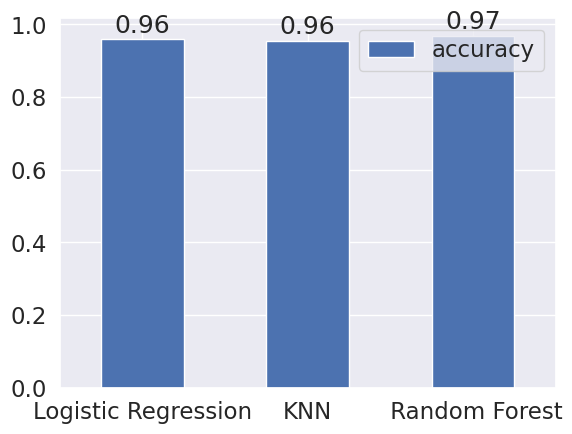

In [56]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# Transpondo o DataFrame e plotando o gráfico 
ax = model_compare.T.plot.bar()

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Definindo as labels do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Exibindo o gráfico
plt.show()

### 4.4 Aplicação de Técnicas para Ajustar os Hiperparâmetros e melhorar a pontuação obtida com cada modelo

#### 4.4.1 Ajuste de Hiperparâmetros para o KNN

In [23]:
# Ajustando para o KNN

train_scores = []
test_scores  = []

# Criando uma lista de diferente valores para o Hiperparâmetro  n_neighbors (numero de vizinho):

#default -> n_neighbors = 5
neighbors = range(1, 21)

# Configura
knn = KNeighborsClassifier()

# Loop para aplicar diferente valores de n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Ajustando o algoritmo para os dados de treino
    knn.fit(X_train, y_train)
    
    # Atualizando a lista de pontuação para os dados de treino (train_score)
    train_scores.append(knn.score(X_train, y_train))
    
    # Atualizando a lista de pontuação para os dados de teste  (test_score)
    test_scores.append(knn.score(X_test, y_test))

In [24]:
lista = list(range(1, 21))
for i in lista:
    print("Valor da pontuação para os dados de Treino {} : {:.5f}".format(i,
                                                                          train_scores[i-1]))
    if i == 20:
        print("\n")
for i in lista:                                                   
    print("Valor da pontuação para os dados de Teste  {} : {:.5f}".format(i,   
                                                                          test_scores[i-1]))

Valor da pontuação para os dados de Treino 1 : 0.99640
Valor da pontuação para os dados de Treino 2 : 0.96801
Valor da pontuação para os dados de Treino 3 : 0.97035
Valor da pontuação para os dados de Treino 4 : 0.96293
Valor da pontuação para os dados de Treino 5 : 0.96456
Valor da pontuação para os dados de Treino 6 : 0.96083
Valor da pontuação para os dados de Treino 7 : 0.96225
Valor da pontuação para os dados de Treino 8 : 0.95908
Valor da pontuação para os dados de Treino 9 : 0.95993
Valor da pontuação para os dados de Treino 10 : 0.95769
Valor da pontuação para os dados de Treino 11 : 0.95874
Valor da pontuação para os dados de Treino 12 : 0.95676
Valor da pontuação para os dados de Treino 13 : 0.95727
Valor da pontuação para os dados de Treino 14 : 0.95581
Valor da pontuação para os dados de Treino 15 : 0.95624
Valor da pontuação para os dados de Treino 16 : 0.95500
Valor da pontuação para os dados de Treino 17 : 0.95555
Valor da pontuação para os dados de Treino 18 : 0.95414
V

Máxima pontuação do Modelo KNN para o dados de teste: 0.95555%


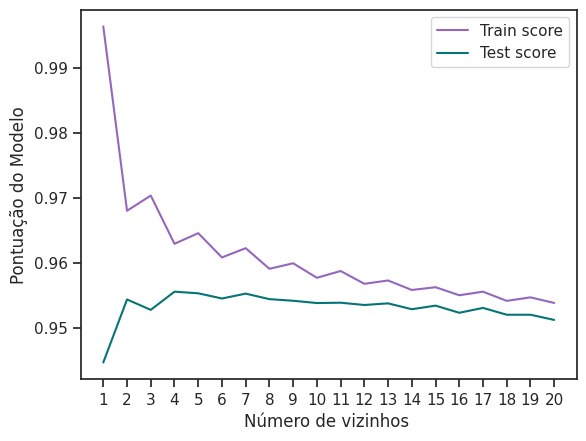

In [25]:
plt.plot( neighbors, train_scores, label="Train score")
plt.plot( neighbors, test_scores , label="Test score")

plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Número de vizinhos ")
plt.ylabel("Pontuação do Modelo")

plt.legend()

print("Máxima pontuação do Modelo KNN para o dados de teste: {:.5f}%".format(max(test_scores)))

#### 4.4.2 Ajuste de Hiperparâmetros para o Modelos LogisticRegression utilizando RandomizadSearchCV 

In [26]:
#Definindo a grade de hiperpar# Criando a grade de valores de alguns hiperparâmetros do Modelo LogisticRegression
grade_value_reg_log = {"C"     : np.logspace(-4,4,20),
                       "solver": ["liblinear"]}

In [27]:
np.random.seed(42)

# Configurando a pesquisa aleatoria de hiperparâmetros para o modelo LogisticRegression
pesq_alet_reg_log = RandomizedSearchCV(LogisticRegression(),
                                       param_distributions = grade_value_reg_log,
                                       cv      = 5,
                                       n_iter  = 20,
                                       verbose = True)
#

pesq_alet_reg_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
print('Melhoras parâmetros obtidos: {}'.format(pesq_alet_reg_log.best_params_))
print('Score obtido com o Ajuste dos parâmetros para o modelo LogisticRegression usando o RandomizedSearchCV: {}'.format(pesq_alet_reg_log.score(X_test, y_test)))

Melhoras parâmetros obtidos: {'solver': 'liblinear', 'C': 10000.0}
Score obtido com o Ajuste dos parâmetros para o modelo LogisticRegression usando o RandomizedSearchCV: 0.959


#### 4.4.3 Ajuste de Hiperparâmetros para o Modelo RandomForestClassifier utilizando RandomizadSearchCV 

In [29]:
# Criando a grade de valores de alguns hiperparâmetros do Modelo RandomForestClassifier
grade_value_rf      = {"n_estimators"     : np.arange(10, 1000, 50),
                       "max_depth"        : [None, 3, 5, 10],
                       "min_samples_split": np.arange(2,20,2),
                       "min_samples_leaf" : np.arange(1,20,2)}

In [30]:
np.random.seed(42)

pesq_alet_rf = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions = grade_value_rf,
                                  cv = 5,
                                  n_iter = 20,
                                  verbose = True)

pesq_alet_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
print('Melhoras parâmetros obtidos: {}'.format(pesq_alet_rf.best_params_))
print('Score obtido com o Ajuste dos parâmetros para o modelo LogisticRegression usando o RandomizedSearchCV: {}'.format(pesq_alet_rf.score(X_test, y_test)))

Melhoras parâmetros obtidos: {'n_estimators': 460, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_depth': None}
Score obtido com o Ajuste dos parâmetros para o modelo LogisticRegression usando o RandomizedSearchCV: 0.9723


### 4.5 Métricas de Avaliação

Para validar um modelo de machine learning, é necessário verificar as métricas de avaliação para modelos de classificação, não só os scores obtidos no conjunto de teste da primeira execução.

* curva ROC e AUC score
* Matriz de confusão
* Classificatic report
* Precision
* Recall
* F1-score

#### 4.5.1 curva ROC 

In [55]:
y_preds = pesq_alet_rf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

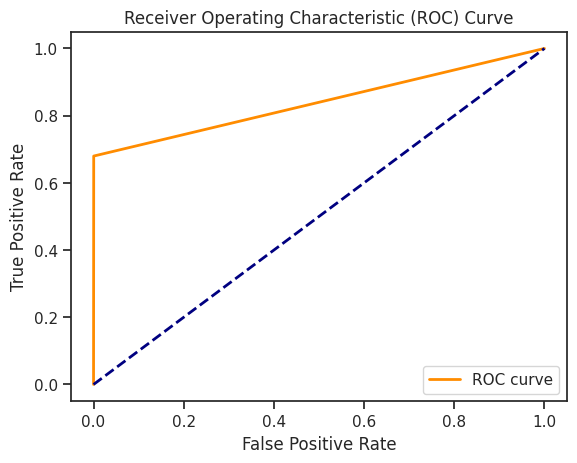

In [35]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 4.5.2 Matriz de confusão

In [36]:
print(confusion_matrix(y_test, y_preds))

[[18285     7]
 [  547  1161]]


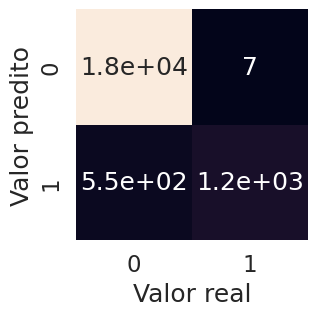

In [37]:
sns.set(font_scale=1.5)

def plot_conf_mat (y_test, y_preds):
    """
    
    """
    fig,ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                                      annot= True,
                                      cbar = False)
    plt.xlabel("Valor real")
    plt.ylabel("Valor predito")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

#### 4.5.3 Classificatic report

- Acurácia: Boa para casos com classes balanceadas, mas pode ser enganosa em classes desbalanceadas.

- Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas

- Recall: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

- F1-Score: Útil quando precisamos balancear precisão e recall

- Para a classe 1, a Especificidade é de 68%, o que indica que o modelo identificou corretamente 68% das instâncias da classe 1.

In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



#### 4.5.4 Calculando as métricas de avaliação usando cross_val_score

In [39]:
# Verificando os parametros do melhor modelo
pesq_alet_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [40]:
# Criando um novo classificador com os melhores parametros

clf = RandomForestClassifier(n_estimators = 460,
                             min_samples_split = 6,
                             min_samples_leaf = 9,
                             max_depth = None)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=6,
                       n_estimators=460)

In [41]:
# Calculando a Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring="accuracy")
cv_acc

array([0.9723 , 0.97275, 0.9699 , 0.9732 , 0.97165])

In [42]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9719599999999999

In [43]:
# Calculando a Precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring="precision")
cv_precision

array([0.9922813 , 0.99319149, 0.99638989, 0.9907173 , 0.99049265])

In [44]:
cv_precision = np.mean(cv_precision)
cv_precision

0.9926145275305144

In [45]:
# Calculando o Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring="recall")
cv_recall

array([0.68      , 0.68588235, 0.64941176, 0.69058824, 0.67411765])

In [46]:
cv_recall = np.mean(cv_recall)
cv_recall

0.6759999999999999

In [47]:
# Calculando o f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring="f1")
cv_f1

array([0.80669923, 0.81197772, 0.78589241, 0.81414702, 0.80237845])

In [48]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8042189664240089

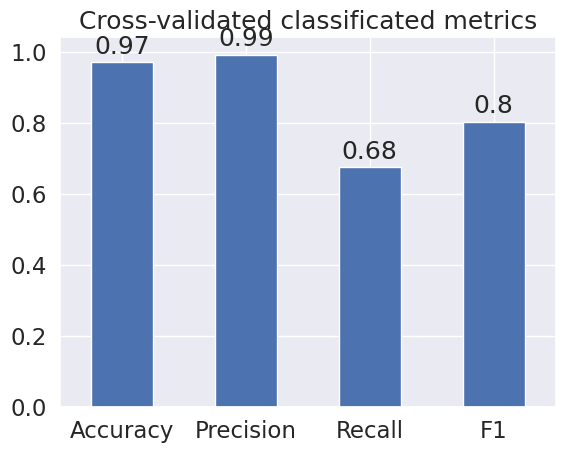

In [57]:
# Visualização da métricas com cross-validated

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision": cv_precision,
                           "Recall"   : cv_recall,
                           "F1"       : cv_f1},
                           index = [0])
#cv_metrics.T.plot.bar(title  = "Cross-validated classificated metrics",
#                      legend = False);

ax = cv_metrics.T.plot.bar(title="Cross-validated classificated metrics", legend=False)

# Adiciona os valores nas barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2,  # Posição x
            i.get_height() + 0.01,          # Posição y
            str(round(i.get_height(), 2)),  # Valor da altura da barra (com 2 casas decimais)
            ha='center', va='bottom')       # Alinhamento horizontal e vertical

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

#### 4.5.5 Feature Importances

In [50]:
feature_dict = dict(zip(X.columns, list(clf.feature_importances_)))
feature_dict

{'idade': 0.0574153579512124,
 'hipertensao': 0.014612816884049171,
 'doenca_cardiaca': 0.0073408432880142154,
 'imc': 0.04840605928135847,
 'nvl_hemoglobinaA1c_sangue': 0.49291343994406245,
 'nvl_gli_sangue': 0.37931148265130316}

In [51]:
clf.feature_importances_

array([0.05741536, 0.01461282, 0.00734084, 0.04840606, 0.49291344,
       0.37931148])

In [52]:
df_X = pd.DataFrame()

# Criar uma lista com os nomes das características
feature_names = ['idade', 'hipertensao', 'doenca_cardiaca', 'imc', 'nvl_hemoglobinaA1c_sangue', 'nvl_gli_sangue']

# Repetir a lista para corresponder ao número de linhas no DataFrame df_X
#repeated_feature_names = [feature_names] * len(df_X)

# Adicionar a lista repetida como uma nova coluna no DataFrame df_X
df_X['feature_names'] = feature_names


<Axes: ylabel='feature_names'>

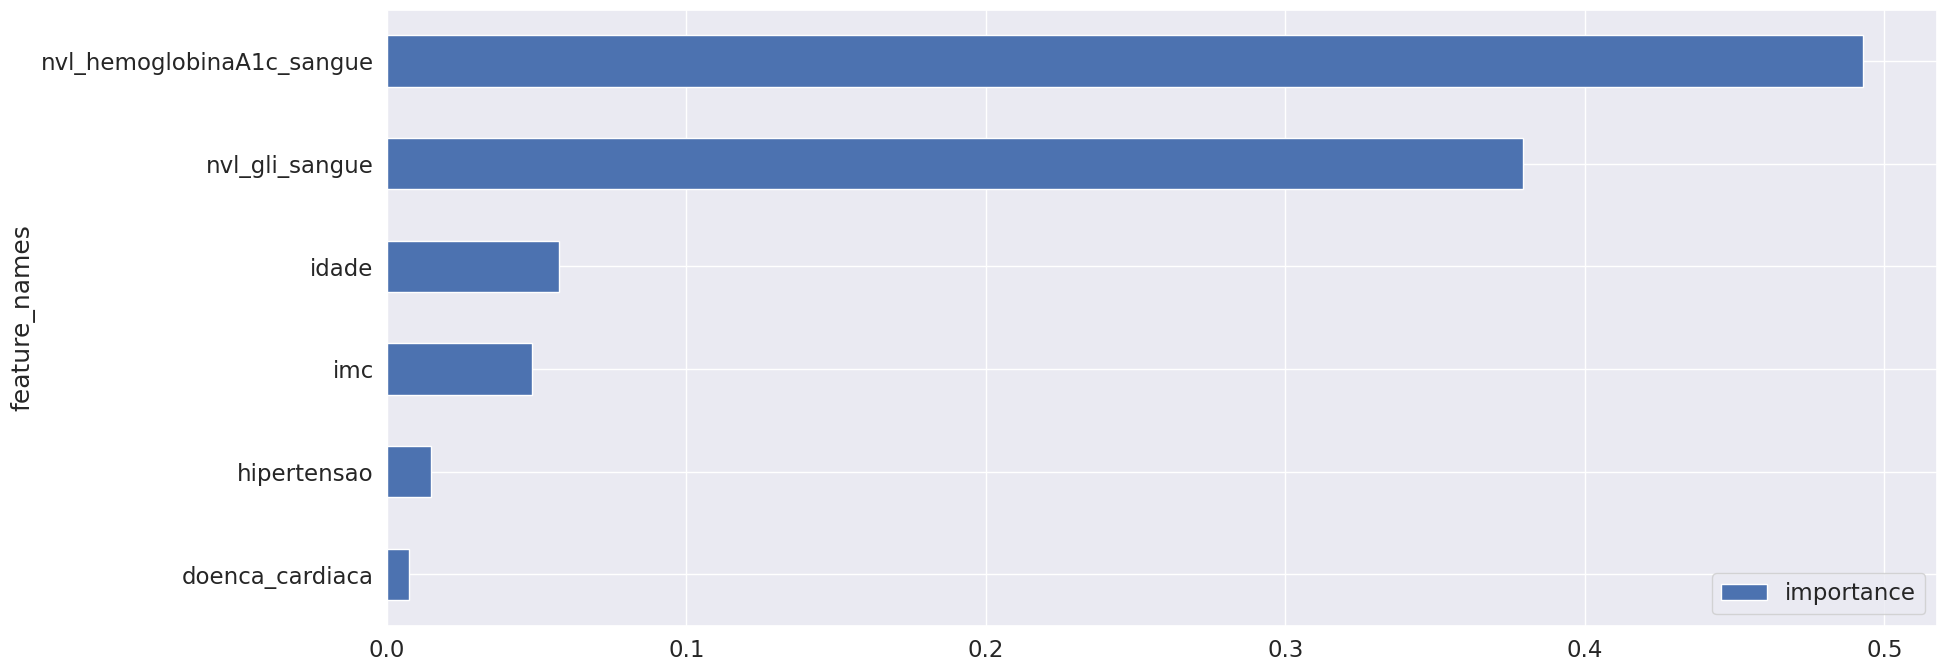

In [53]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = df_X['feature_names'],
                                   columns = ['importance']).sort_values('importance',ascending=True)

fig, ax = plt.subplots(figsize=(20,8))
feature_importances.plot(kind="barh", ax = ax)